#### Numpy
#### OpenCV

In [ ]:
# np = common abbreviation for numpy
import numpy as np

# Random Sampling? No problem!
random_mtx = np.random.random((10, 10))

# A lot of functions built in
print(random_mtx)
print("norm-1 = ", np.linalg.norm(random_mtx))

# But different behavior depending on the parameters you give it!
print("norm-2 = ", np.linalg.norm(random_mtx, axis=0))
print("norm-3 = ", np.linalg.norm(random_mtx, ord=2))

[[0.64285407 0.81523603 0.08086972 0.90110418 0.29144377 0.54941217
  0.9244211  0.45549608 0.1690663  0.95214639]
 [0.49056723 0.68832789 0.04353489 0.60854574 0.80661648 0.78717055
  0.27002177 0.17278015 0.20356556 0.50877414]
 [0.83275963 0.70917379 0.98361676 0.82616565 0.60847017 0.00299594
  0.94293075 0.85391923 0.55050707 0.3963302 ]
 [0.54516227 0.49994509 0.18995713 0.36478053 0.29926006 0.22273258
  0.80264271 0.1373651  0.85305859 0.76803793]
 [0.67639769 0.2708244  0.91481005 0.48317038 0.86615838 0.41073814
  0.47798744 0.27593043 0.59799662 0.89231444]
 [0.32417062 0.63481146 0.23130502 0.91357134 0.08980382 0.94542727
  0.4388246  0.06616612 0.81262532 0.71250793]
 [0.67307384 0.31254704 0.46424362 0.29613467 0.26024377 0.89157854
  0.76403717 0.39432175 0.72206734 0.68133211]
 [0.4060411  0.50104765 0.12934883 0.61760082 0.84415823 0.0226217
  0.60186477 0.63004773 0.15973392 0.13876202]
 [0.66362769 0.34135008 0.45853539 0.14022654 0.25972253 0.32803236
  0.99049246 

Q1. Add your explanation in the answer text block on what are the different results from the previous cell

#Answer-1

**norm-1** is the default option (ord = None, axis = None), so it will compute the norm with square root of whole matrix

**norm-2** is to compute the vector norm for each row of matrix so the result is an array

**norm-3** is to compute the norm with squre root for the largest singular value of the matrix




In [ ]:
# 2nd numpy question
mtx1 = np.array([[1,2], [3, 4], [5, 6]])
mtx2 = np.array([[6, 5, 4], [3, 2, 1]])

# get results? 
res1 = mtx1.dot(mtx2)
print(res1)

# No error? 
res2 = mtx1 * mtx2 

[[12  9  6]
 [30 23 16]
 [48 37 26]]


ValueError: ignored

Q2. Add your explanation in the answer text block to explain what happen when the previous cell is executed

#Answer-2

mtx1 is a 2x3 matrix; mtx2 is a 3x2 matrix

(1) res1 is to do matrix multiplication so it's legal to do this do product.

(2) res2 is to do broadcasting of two arrays. mtx1 has different array size so numpy returns the broadcast error.


# OpenCV

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
from google.colab import files
# please upload the input.jpg image here
uploaded = files.upload()

Saving input.jpg to input.jpg


In [ ]:
# get image name
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "input.jpg" with length 287075 bytes


<class 'numpy.ndarray'>


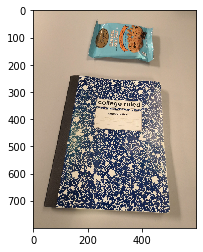

In [ ]:
# get image
# Load in Grayscale
img = cv2.imread(fn)

# The underlying representation is a numpy array!
print(type(img))

imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb)
plt.show()

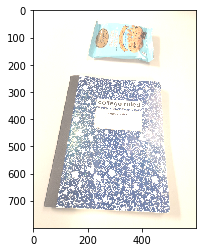

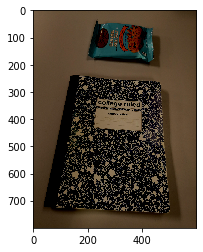

In [ ]:
# Q3
# Add you code here to use OpenCV function to increase or decrease the brightness of the input image
filter = np.zeros_like(imgrgb)
filter[:,:,:] = 100

lighter = cv2.add(imgrgb, filter)
plt.imshow(lighter)
plt.show()

darker = cv2.subtract(imgrgb, filter)
plt.imshow(darker)
plt.show()


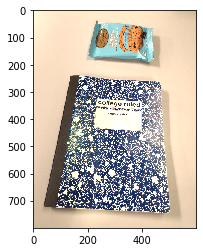

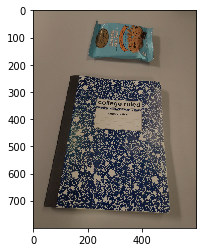

In [ ]:
# Q4
# Add your code here to use OpenCV function to increase or decrease the contrast of the input image

filter = np.zeros_like(imgrgb)
hst = 1.3
lst = 0.7

high = cv2.addWeighted(imgrgb, hst, filter, 0.0, 0)
low  = cv2.addWeighted(imgrgb, lst, filter, 0.0, 0)

plt.imshow(high)
plt.show()

plt.imshow(low)
plt.show()

In [ ]:
# please upload the target.jpg image here
uploaded = files.upload()

Saving target.jpg to target.jpg


In [ ]:
# get image name
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "target.jpg" with length 105073 bytes


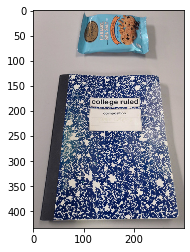

target image size: (434, 300, 3)


In [ ]:
img2 = cv2.imread(fn)
imgrgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb2)
plt.show()

print("target image size: {}".format(imgrgb2.shape))

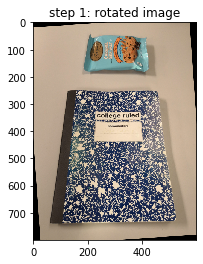

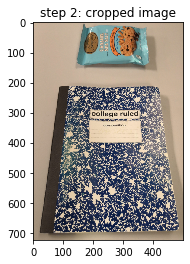

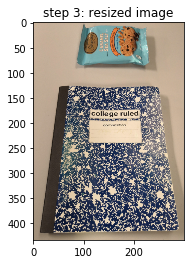

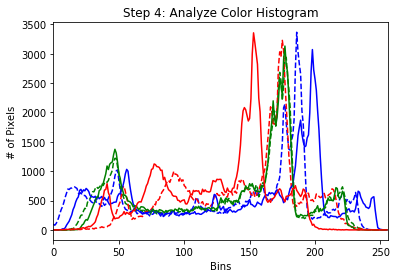

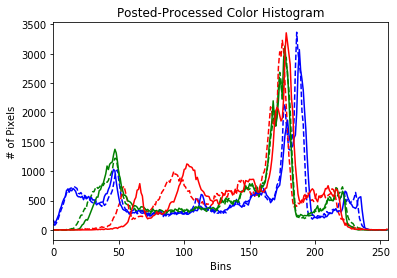

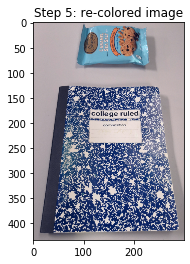

Processed image size: (434, 300, 3)


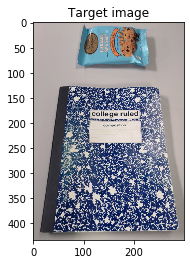

target image size: (434, 300, 3)


In [ ]:
# Q5
# Add your code here to use OpenCV functions to bring the input image to look as close to the target image as possible
h, w, c = imgrgb.shape

#Step 1: rotate the image
M = cv2.getRotationMatrix2D((w//2, h//2), 4, 1)
rotated_img = cv2.warpAffine(imgrgb, M, (w, h))
plt.imshow(rotated_img)
plt.title("step 1: rotated image")
plt.show()

#Step 2: crop the image
cropped_img = rotated_img[38:h-38,40:w-60]
plt.imshow(cropped_img)
plt.title("step 2: cropped image")
plt.show()

#Step 3: resize the image
resized_img = cv2.resize(cropped_img, (300, 434))
plt.imshow(resized_img)
plt.title("step 3: resized image")
plt.show()

#Step 4: analyze the color histogram
chans1 = cv2.split(imgrgb2)
chans2 = cv2.split(resized_img)
colors = ("b", "g", "r")
plt.figure()
plt.title("Step 4: Analyze Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans1, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color, linestyle='--')
    plt.xlim([0, 256])

for (chan, color) in zip(chans2, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color, linestyle='-')
    plt.xlim([0, 256])

plt.show()

#Step 5: re-colored image
target_img=resized_img.copy()
filter = np.zeros_like(resized_img[:,:,0])

## G is similar so no need to change. 
## B needs to decrease 10.
filter[:,:] = 10
target_img[:,:,0] = cv2.subtract(resized_img[:,:,0], filter)

## R needs to increase 25
filter[:,:] = 25
target_img[:,:,2] = cv2.add(resized_img[:,:,2], filter)

chans3 = cv2.split(target_img)
colors = ("b", "g", "r")
plt.figure()
plt.title("Posted-Processed Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans1, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color, linestyle='--')
    plt.xlim([0, 256])

for (chan, color) in zip(chans3, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()


plt.imshow(target_img)
plt.title("Step 5: re-colored image")
plt.show()
print("Processed image size: {}".format(target_img.shape))


plt.imshow(imgrgb2)
plt.title("Target image")
plt.show()
print("target image size: {}".format(imgrgb2.shape))